In [2]:
# IMPORT THE NECESSARY LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [4]:
# LOAD THE TRAIN DATASET

#train= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train= pd.read_csv('bigdatamart_Train.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
train.shape  # train dataset shape

(8523, 12)

In [6]:
#  let's check Null in train dataset
train.isnull().sum()

# about 30 % null value in 'Outlet_size' &  

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
# LOAD THE   TEST dataset

test= pd.read_csv('bigdatamart_Test.csv')
# in test dataset target_feature= ('Outlet_Sales') is missing , so we will test over this dataset

In [19]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
test.shape  # test dataset shape

(5681, 11)

In [20]:
#
test.isnull().sum()
##                           30 % Null value is in 'Outlet_size'

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# ##
In above Test dataset 'Outlet_Sales' is missing, so i do analysed the both dataset & 
FIT the model only over (train_dataset)
 and last predict 'Outlet_Sales' of test_dataset according to the input_features of test_dataset  

In [78]:
# in test_dataset add 'Item_Outlet_sales ' feature and put that value zero
test['Item_Outlet_Sales']= 0 

df= pd.concat([train,test] ,axis=0,ignore_index=True )    # Concating both dataset


In [79]:
df= pd.concat([train,test] ,axis=0,ignore_index=True )    # Concating both dataset


In [65]:
df.head()  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0


In [14]:
df.shape  # checking shape of dataset after concating

(14204, 12)

In [15]:
## checking null value

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [81]:
# fill Nan value in 'Item_weight' according groupby 'Item_Type' is best suitable feature in the dataset

df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace= True)

In [82]:
#
df['Item_Weight'].isnull().sum()

0

In [83]:
# Brief information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [84]:

df.describe()   # statistical description

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793006,0.065953,141.004977,1997.830681,1308.865489
std,4.240924,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,9.300000,0.027036,94.012000,1987.000000,0.000000
50%,12.800000,0.054021,142.247000,1999.000000,559.272000
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


 LET'S DO EDA 

In [20]:
df['Item_Identifier'].value_counts() # 1599 different types of values 

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [20]:
print(df['Item_Fat_Content'].value_counts())  # categorical feature      


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

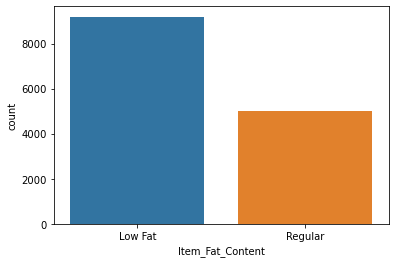

In [80]:
# 'LF','low fat' convert these value into 'Low Fat' and 'reg' convert into 'Regular'

df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}, inplace=True)

print(df['Item_Fat_Content'].value_counts())
sns.countplot(df['Item_Fat_Content'])

In [24]:
#  values  count
df['Item_Type'].value_counts()     #   16 different types of variable in this feature

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

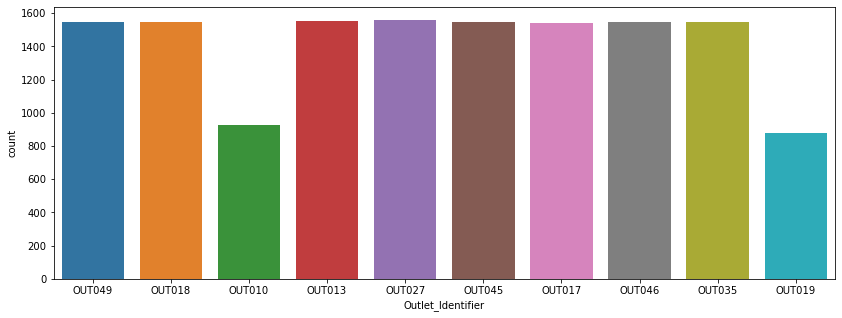

In [39]:
# Plotting coutplot of  'Outlet_Identifier'
plt.figure(figsize=(14,5))
sns.countplot(df['Outlet_Identifier'])

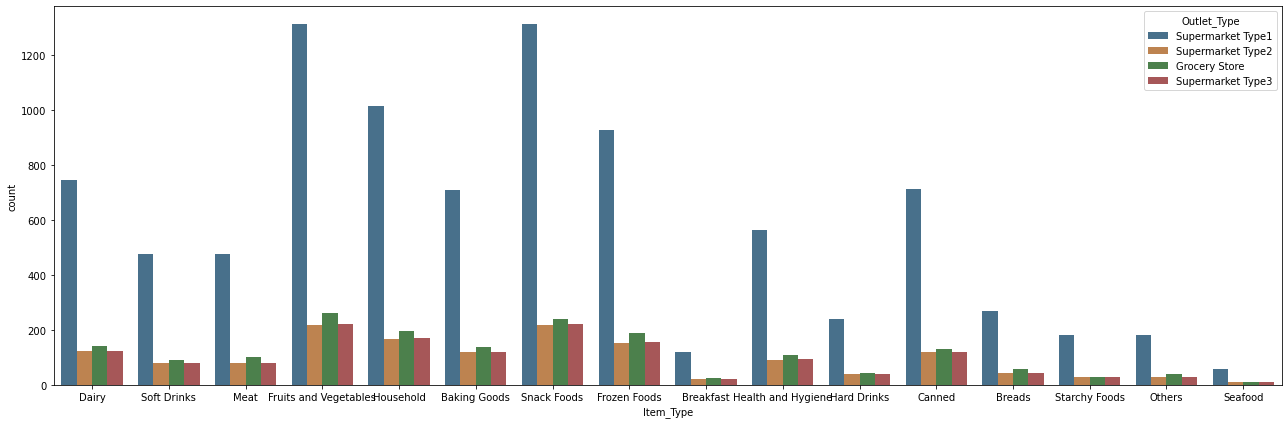

In [34]:
# PLOTTING  COUNTPLOT OF 'ITEM-TYPE'
plt.figure(figsize=(18,6))
sns.countplot(df['Item_Type'],hue=df['Outlet_Type'],saturation=0.45)

plt.tight_layout()  
# all item_type in Supermarket_Type1 are high selling compare to another 'Outlet_type'
# 'seafood', 'breakfast_health' and 'starchy food'  sale very minimum 

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

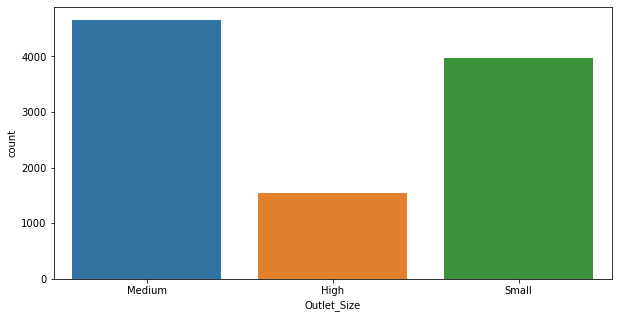

In [77]:
print(df['Outlet_Size'].value_counts())                    # categorical feature
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Size'])                     #   3 different types of values in this feature

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

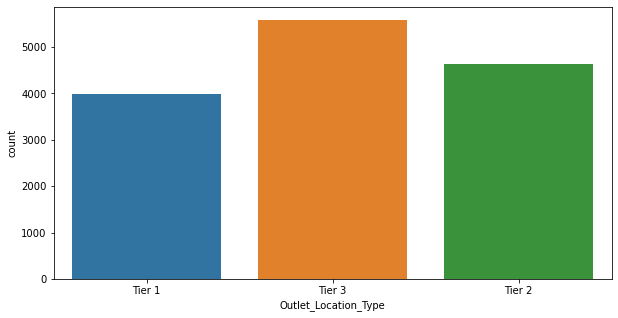

In [78]:
#
print(df['Outlet_Location_Type'].value_counts())  
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Location_Type'])                    
#  3 different types of values in this feature

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

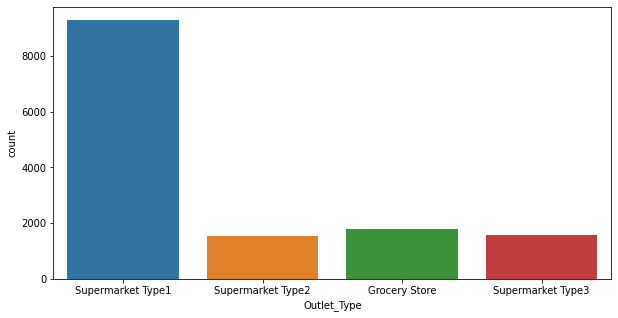

In [29]:
plt.figure(figsize=(10,5))                        #   categorical feature
sns.countplot(df['Outlet_Type'])             #  4 differrent types of variable in this feature

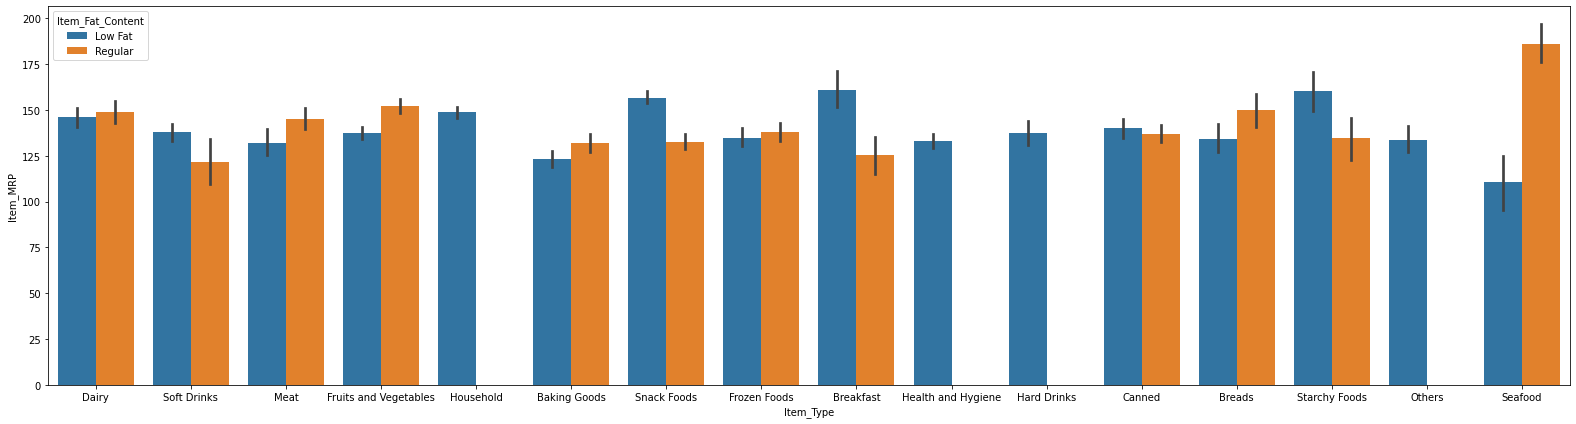

In [81]:
# plotting scatterplot to see 'Item_MRP' is show any relationship with 'item_type'
plt.figure(figsize=(22,6))
sns.barplot( 'Item_Type' ,'Item_MRP', data= df, hue= 'Item_Fat_Content')
plt.tight_layout()
# Four Item_type have only low fat content

<AxesSubplot:xlabel='Item_Type'>

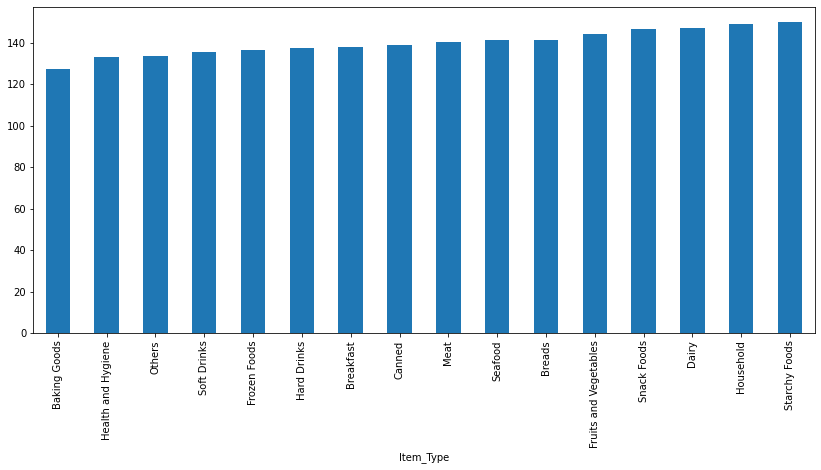

In [74]:
#
plt.figure(figsize=(14,6))
df.groupby(['Item_Type'])['Item_MRP'].mean().sort_values().plot(kind='bar')

# in this plot appear minimum average item _MRP is of 'Baking Goods' 
# maximum  average item_MRP is of 'Starchy Foods'

<AxesSubplot:xlabel='Outlet_Identifier'>

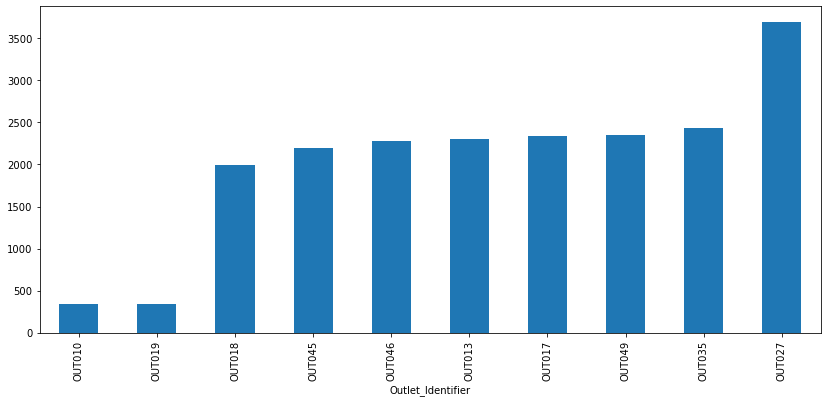

In [75]:
# checking average sales of outlet
plt.figure(figsize=(14,6))
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Outlet_Type'>

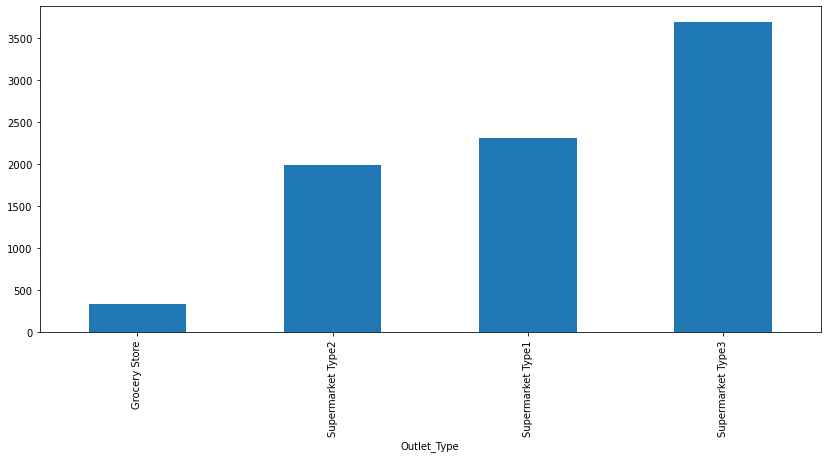

In [76]:
# let's check which Outlet_type has the maximum average 'Outlet_Sales'
plt.figure(figsize=(14,6))
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values().plot(kind='bar')

<AxesSubplot:>

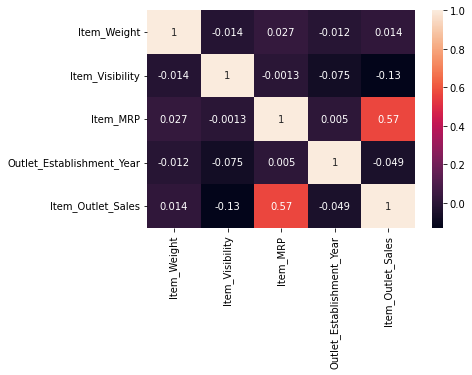

In [30]:
# CHECKING  CORRELATION

sns.heatmap(train.corr(), annot=True)

# in this train dataset no have correlation between 'target_feature' and 'input_features' except 'Item_MRP'

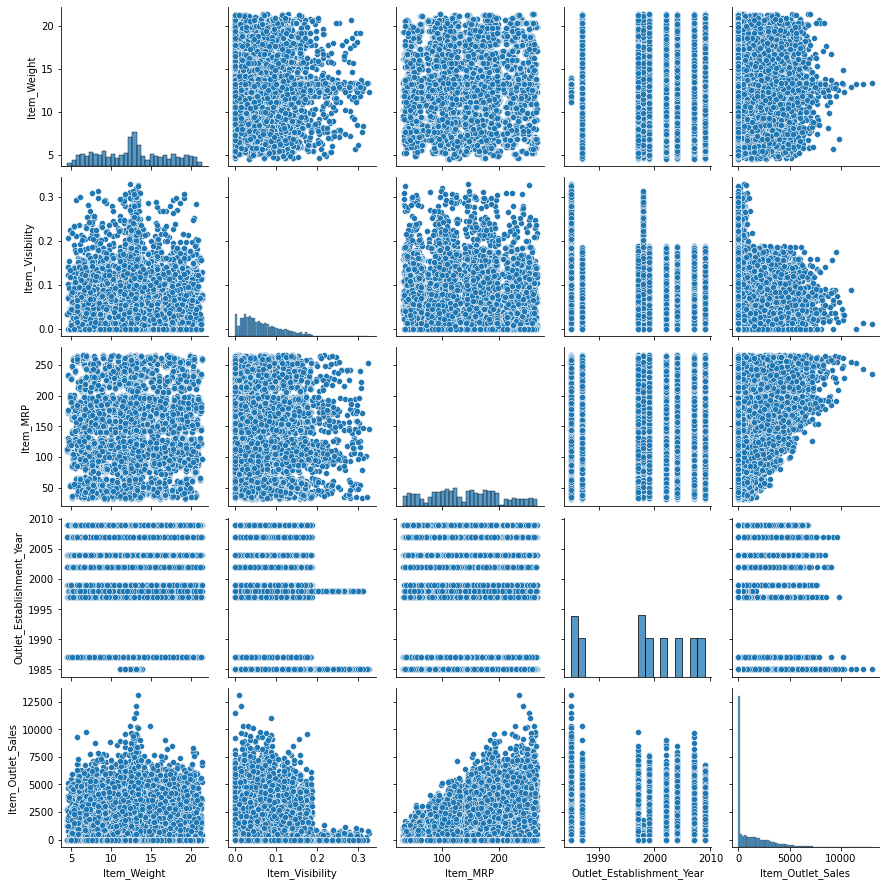

In [31]:
sns.pairplot(df)

#  'Item_MRP' feature correlation is high with target_feature compare to another input feature
#  paiplot also shown good correlation  between 'Item_MRP' AND target_feature

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

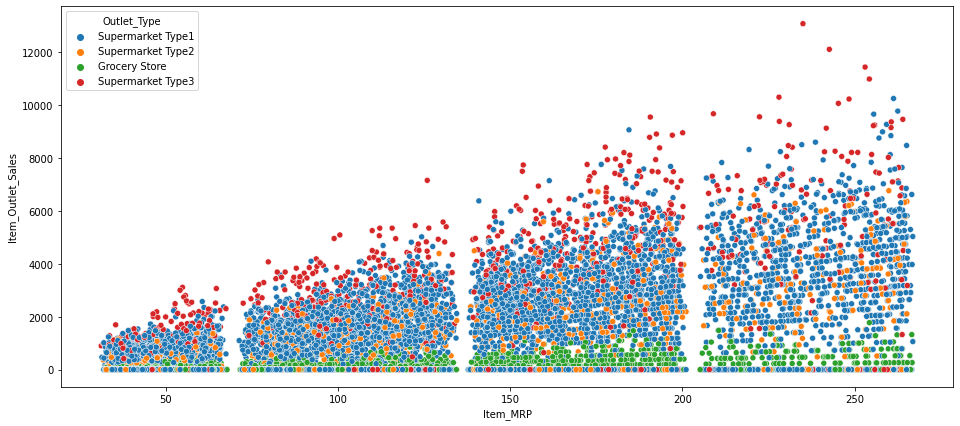

In [33]:
# plotting scatterplot 'item mrp' vs 'outlet_sales'

plt.figure(figsize=(16,7))
sns.scatterplot('Item_MRP', 'Item_Outlet_Sales', data=df, hue='Outlet_Type')

# The product price between 100 to 200 that sold more 

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

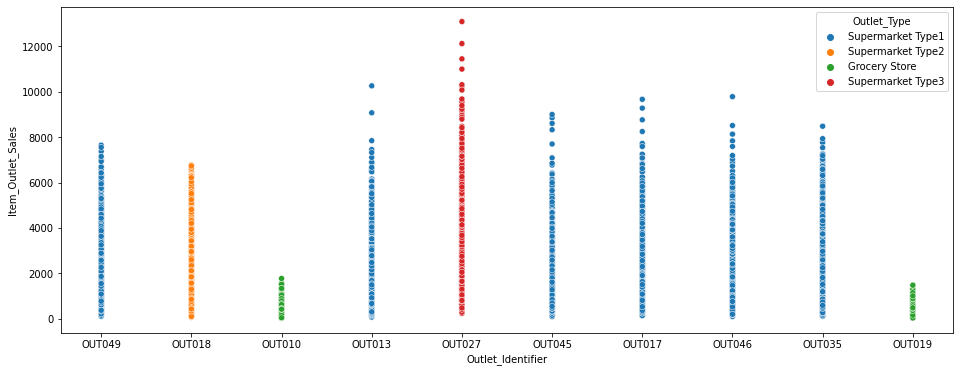

In [60]:
plt.figure(figsize=(16,6))

sns.scatterplot('Outlet_Identifier', 'Item_Outlet_Sales', data=train, hue='Outlet_Type')

# 6 outlet_identifier related to 'Supermarket_Type1' = blue
# 1 outlet_identifier related to 'Supermarket_Type3' = red
#  1 oulet_identifier related to 'Supermarket_Type2' = yellow
# 1 oulet_identifier related to 'Grocery'
#  in 'Supermarket_Type1' has more outlet so more customer come for shopping in 'Supermarket_Type1' 

# one thing i seen in this plot 'Supermarket_type3' has only one 'outlet', but highest product sale in this 'Outlet'  

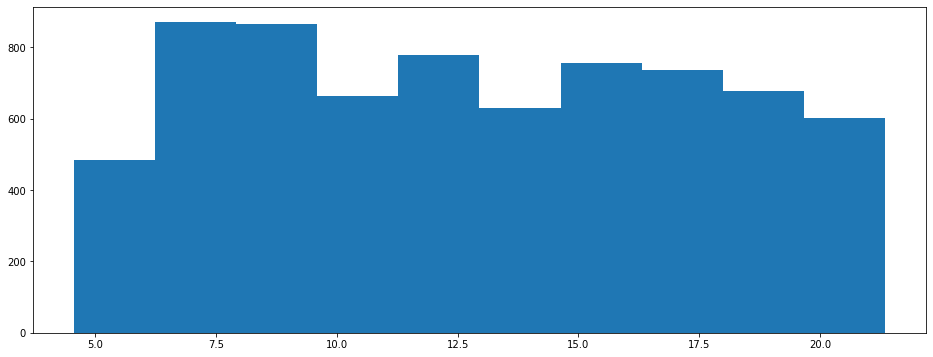

In [27]:
plt.figure(figsize=(16,6))
plt.hist(train['Item_Weight'])
plt.show()
# the product whose 'weight' is 6.2 to 9 that was more sold

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

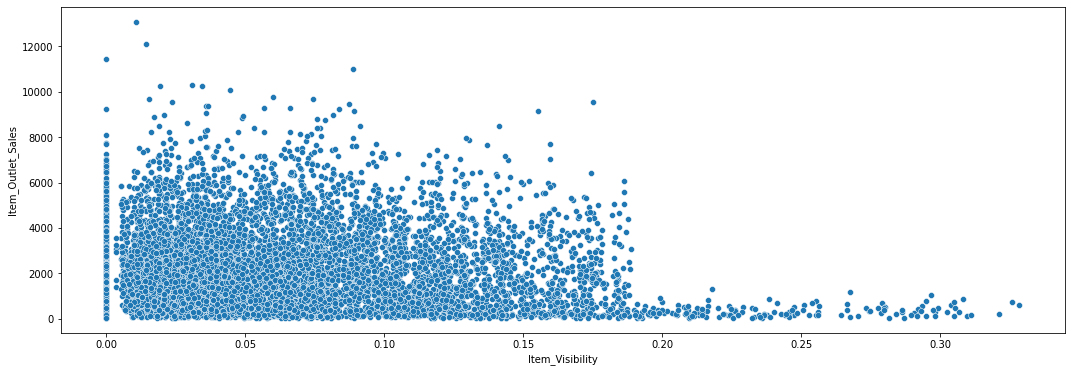

In [33]:
# plotting  scatterplot 'Item_Visibility' vs 'Item_Outlet_Sales' to find any relationship 

plt.figure(figsize=(18,6))
sns.scatterplot('Item_Visibility', 'Item_Outlet_Sales', data=train)

#  products whose  'item visibility' are high,   very less selling  
# seen in this plot some item_visibility is zero but really not possible it
#       so convert to zero value into mean by groupby('Item_Type')

In [85]:
# convert 0 to np.nan
df['Item_Visibility'].replace({0:np.nan}, inplace=True)

In [86]:
# 0 replace with (groupby method of 'item_type') of 'item_visibility' 

df['Item_Visibility'].fillna(df.groupby(['Item_Type'])['Item_Visibility'].transform('mean'), inplace=True)


In [70]:

pd.set_option('display.max_rows',None)
train.groupby(['Outlet_Type'])['Item_Outlet_Sales', 'Item_MRP'].aggregate(['mean','min','max'])

Item_Outlet_Sales                          Item_MRP  \
                               mean       min         max        mean   
Outlet_Type                                                             
Grocery Store            339.828500   33.2900   1775.6886  140.294688   
Supermarket Type1       2316.181148   73.2380  10256.6490  141.213894   
Supermarket Type2       1995.498739   69.2432   6768.5228  141.678634   
Supermarket Type3       3694.038558  241.6854  13086.9648  139.801791   

                                      
                       min       max  
Outlet_Type                           
Grocery Store      32.6558  266.6884  
Supermarket Type1  31.4900  266.8884  
Supermarket Type2  31.8900  265.1884  
Supermarket Type3  31.2900  265.2884

PLOTTING DISTRIBUTION PLOT


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

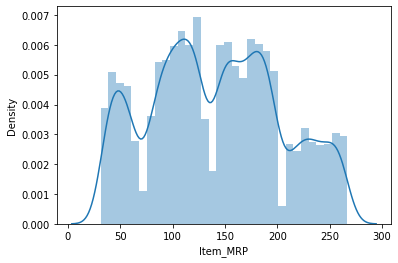

In [61]:
sns.distplot(df['Item_MRP'])  # continuous feature
# product which price 100-200 sales are high

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

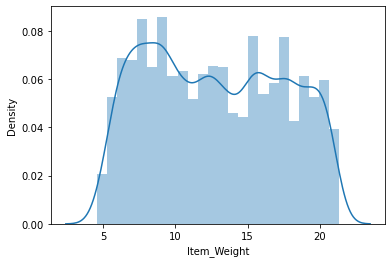

In [25]:
sns.distplot(df['Item_Weight'])  # train dataset feature 'Item_Weigt' distribution plot

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

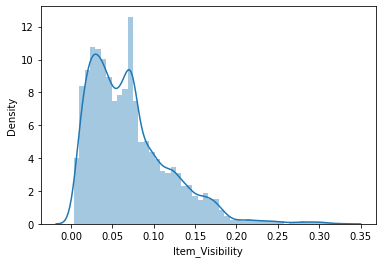

In [64]:
# plotting df dataset distribution plot
sns.distplot(df['Item_Visibility'], )

TREAT SKEWNESS


In [77]:
df[['Item_Weight','Item_MRP','Item_Visibility']].skew()  # traet skewness only on continuous features

Item_Weight        0.110306
Item_MRP           0.130728
Item_Visibility    0.000000
dtype: float64

In [87]:
df['Item_Visibility']= np.sqrt(df['Item_Visibility'])

In [88]:
df['Item_Visibility'].skew()  # checking skewness after removing

0.4000311677772823

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

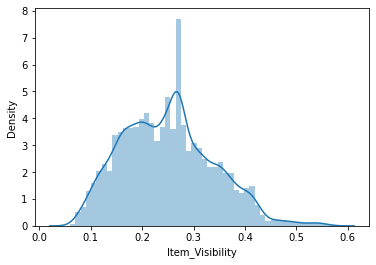

In [89]:
sns.distplot(df['Item_Visibility'])


TREATING OUTLIERS

In [90]:

from scipy.stats import zscore
(np.abs(zscore(df[['Item_Weight','Item_MRP','Item_Visibility']]))<3).all()

# 'item_visibility' have some outliers 

Item_Weight         True
Item_MRP            True
Item_Visibility    False
dtype: bool

In [91]:
# treat OUTLIER 

from scipy.stats import zscore

z_scores=zscore(df[['Item_Weight','Item_MRP','Item_Visibility']])
X_new=df.loc[(abs(z_scores)<3).all(axis=1)]


In [92]:
print('original_shape=',df.shape)
print('new dataset shape after removing outliers=',X_new.shape)

original_shape= (14204, 12)
new dataset shape after removing outliers= (14127, 12)


In [93]:
#
X_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.270748,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.251368,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
# remove some unimportant features ,
#  these features don't fit any combination to give some information about target_variable 
#  
X_new.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Size'],axis=1, inplace=True)

# THESE three feature not much important for given any information about "Oulet_Sales" Target feature

In [95]:
X= pd.get_dummies(X_new, drop_first=True) # 

In [96]:
x1 = X.loc[X['Item_Outlet_Sales']!=0]   # train & test over this dataset 

In [97]:
x= x1.drop('Item_Outlet_Sales', axis=1)   # INPUT features

In [98]:
y= x1.Item_Outlet_Sales     # TARGET FEATURES

In [99]:
print('x=', x.shape)
print('y=',y.shape)

x= (8479, 33)
y= (8479,)


In [100]:

# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]

d=pd.DataFrame({'features':features,'vif_value':vif_value})   #
d.head(5)               # no multicollinearity 

# in this dataset three contnuous features so no  multicollinearity have in this dataset 

,features,vif_value
0,Item_Weight,1.020201
1,Item_Visibility,1.072076
2,Item_MRP,1.013471
3,Item_Fat_Content_Regular,1.216751
4,Item_Type_Breads,1.351517


In [104]:
y

0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
5         556.6088
6         343.5528
7        4022.7636
8        1076.5986
9        4710.5350
10       1516.0266
11       2187.1530
12       1589.2646
13       2145.2076
14       1977.4260
15       1547.3192
16       1621.8888
17        718.3982
18       2303.6680
19       2748.4224
20       3775.0860
21       4064.0432
22       1587.2672
23        214.3876
24       4078.0250
25        838.9080
26       1065.2800
27        308.9312
28        178.4344
29        125.8362
30        163.7868
31       2741.7644
32       3068.0064
33       2174.5028
34       2085.2856
35       3791.0652
36       2797.6916
37       1609.9044
38        388.1614
39       2180.4950
40       3435.5280
41       2150.5340
42       2527.3768
43       6768.5228
44        373.5138
45        358.2004
46       2428.8384
47       5815.0972
48       2576.6460
49        780.3176
50       3134.5864
51        850.8924
52        81

In [ ]:
TRAIN & TEST THE  MODEL 

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [102]:
sc= StandardScaler()

scaled= sc.fit_transform(x)

In [103]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


now let's make train & test model over the dataset


In [101]:
                                                          # LINEAR_REGRESSION
# IN TRAINING PROCESS         # finding best random_state 
from sklearn.linear_model import LinearRegression

max_acu= 0
max_rs= 0
for r_state in range(60,120):
    x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.25,)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accu = r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.5746705400639268  random_state is : 60
maximum accuracy : 0.579622906380516  random_state is : 66
maximum accuracy : 0.584983790836085  random_state is : 73


In [102]:
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 73,test_size=0.25,)
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)
print('r2_score=', r2_score(y_test,y_pred))
print('mean_squared_error=', mse(y_test,y_pred))
print('mean_absolute_error=', mae(y_test,y_pred))
print('root mean_squared_error=',np.sqrt( mse(y_test,y_pred)))

r2_score= 0.584983790836085
mean_squared_error= 1182736.0253117858
mean_absolute_error= 808.092973295365
root mean_squared_error= 1087.5366776857622


In [114]:
from sklearn.linear_model import LassoCV

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 73,test_size=0.25,)

lasso= LassoCV(alphas=None, max_iter=160,normalize=True)
lasso.fit(x_train,y_train)

alpha= lasso.alpha_
print('alpha=', alpha)

alpha= 0.10491767143583187


In [117]:
from sklearn.linear_model import Lasso

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 73,test_size=0.25,)

lasso= Lasso(alpha=alpha,normalize=True)
lasso.fit(x_train,y_train)

y_pred= lasso.predict(x_test)
print('r2_score with LassoCV=', r2_score(y_test,y_pred))
print('mean_squared_error=', mse(y_test,y_pred))
print('mean_absolute_error=', mae(y_test,y_pred))
print('root mean_squared_error=',np.sqrt( mse(y_test,y_pred)))

r2_score with LassoCV= 0.5858520996483068
mean_squared_error= 1180261.4710880378
mean_absolute_error= 806.4235954720377
root mean_squared_error= 1086.3983942771813


In [118]:
 # IN TRAINING PROCESS         # finding best random_state 
from sklearn.svm import SVR

max_acu= 0
max_rs= 0
for r_state in range(60,120):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    SV = SVR()
    SV.fit(x_train,y_train)
    y_pred=SV.predict(x_test)
    accu = r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.1702677537714009  random_state is : 60
maximum accuracy : 0.18648527087961675  random_state is : 61
maximum accuracy : 0.18886289617667673  random_state is : 68
maximum accuracy : 0.19183659427472566  random_state is : 72
maximum accuracy : 0.19324354385600506  random_state is : 75
maximum accuracy : 0.19422182990903714  random_state is : 93


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 93,test_size=0.25,)
sv = SVR()
sv.fit(x_train,y_train)

y_pred= sv.predict(x_test)
print('r2_score=', r2_score(y_test,y_pred))
print('mean_squared_error=', mse(y_test,y_pred))
print('mean_absolute_error=', mae(y_test,y_pred))
print('root mean_squared_error=',np.sqrt( mse(y_test,y_pred)))

r2_score= 0.19422182990903714
mean_squared_error= 2299706.62866137
mean_absolute_error= 1113.4959203159694
root mean_squared_error= 1516.4783640597614


In [120]:
#                     RANDOM_FOREST
# IN TRAINING PROCESS         # finding best random_state 
from sklearn.ensemble import RandomForestRegressor

max_acu= 0
max_rs= 0
for r_state in range(60,120):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    rf = RandomForestRegressor(n_estimators=160,max_depth=6,)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accu = r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.6053231224101778  random_state is : 60
maximum accuracy : 0.6122347902045782  random_state is : 61
maximum accuracy : 0.6126879077088669  random_state is : 64
maximum accuracy : 0.6220279129093604  random_state is : 66
maximum accuracy : 0.6247880631565426  random_state is : 93
maximum accuracy : 0.6263172034918025  random_state is : 101


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 101,test_size=0.25,)
rf = RandomForestRegressor(n_estimators=160,max_depth=6)
rf.fit(x_train,y_train)
                                                # RANDOMFOREST _REGRESSOR
y_pred= rf.predict(x_test)
print('r2_score=', r2_score(y_test,y_pred))
print('mean_squared_error=', mse(y_test,y_pred))
print('mean_absolute_error=', mae(y_test,y_pred))
print('root mean_squared_error=',np.sqrt( mse(y_test,y_pred)))

r2_score= 0.625756594025338
mean_squared_error= 1109674.948347932
mean_absolute_error= 735.9708274929765
root mean_squared_error= 1053.4111013027782


In [122]:
#                   GRADIENT_BOOSTING REGRESSOR
# IN TRAINING PROCESS         # finding best random_state            # it doen't matter if you give (scaled or unscaled ) 
from sklearn.ensemble import GradientBoostingRegressor
                                                                   #  input data into gradientboosting the score remains same
max_acu= 0
max_rs= 0
for r_state in range(60,120):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    gb = GradientBoostingRegressor()
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    accu = r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.587757951155101  random_state is : 60
maximum accuracy : 0.5994336385248326  random_state is : 61
maximum accuracy : 0.6056510704776766  random_state is : 64
maximum accuracy : 0.6109132911822123  random_state is : 66
maximum accuracy : 0.6151126363662869  random_state is : 73
maximum accuracy : 0.6227416348771284  random_state is : 101


In [123]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 101,test_size=0.25,)
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
                                                        # GRADIENTBOOSTING_REGRESSOR
y_pred= gb.predict(x_test)
print('r2_score=', r2_score(y_test,y_pred))
print('mean_squared_error=', mse(y_test,y_pred))
print('mean_absolute_error=', mae(y_test,y_pred))
print('root mean_squared_error=',np.sqrt( mse(y_test,y_pred)))

r2_score= 0.6227434953894915
mean_squared_error= 1118609.1340135215
mean_absolute_error= 753.3255206351697
root mean_squared_error= 1057.6431978760709


LET'S USE ADABOOST REGRESSOR

In [129]:
#         ADABOOST REGRESSION
# IN TRAINING PROCESS         # finding best random_state 
from sklearn.ensemble import AdaBoostRegressor

max_acu= 0
max_rs= 0
for r_state in range(60,150):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    ad = AdaBoostRegressor()
    ad.fit(x_train,y_train)
    y_pred=ad.predict(x_test)
    accu = r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.4005359490417467  random_state is : 60
maximum accuracy : 0.4368472081852892  random_state is : 62
maximum accuracy : 0.4752375996366238  random_state is : 64
maximum accuracy : 0.4759914300280004  random_state is : 82
maximum accuracy : 0.4793932738492138  random_state is : 93
maximum accuracy : 0.4889125660908399  random_state is : 99


In [130]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 120,test_size=0.25,)
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)                            # ADABOOST_REGRESSOR

y_pred= ad.predict(x_test)
print('r2_score=', r2_score(y_test,y_pred))
print('mean_squared_error=', mse(y_test,y_pred))
print('mean_absolute_error=', mae(y_test,y_pred))
print('root mean_squared_error=',np.sqrt( mse(y_test,y_pred)))

r2_score= 0.46915580871045903
mean_squared_error= 1558227.4399515106
mean_absolute_error= 967.6092127038796
root mean_squared_error= 1248.2898060753002


In [131]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as CVS

In [132]:
kfold= KFold(n_splits=8, shuffle=True)

In [133]:
# CROSS_VALIDATION WITH              LINEAR_REGRESSION

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 73,test_size=0.25,)
print('cross_val_score with LinearRegression',CVS(lr, x_train, y_train, cv=kfold, ).mean())

cross_val_score with LinearRegression 0.5490916698709717


In [134]:
# CROSS_VALIDATION WITH            SVR

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 93,test_size=0.25,)
print('cross_val_score with SVR',CVS(sv, x_train, y_train, cv=kfold, ).mean())

# Get VERY LOW ACCURACY SCORE BY SVR

cross_val_score with SVR 0.16169325931467357


In [135]:
# CROSS_VALIDATION WITH                 RANDOMFOREST REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 101,test_size=0.25,)

print('cross_val_score with RANDOMFOREST_REGRESSOR',CVS(rf, x_train, y_train, cv=kfold, ).mean())

cross_val_score with RANDOMFOREST_REGRESSOR 0.5825025268349839


In [136]:
# CROSS_VALIDATION WITH                       GRADIENTBOOSTING_REGRESSION

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 101,test_size=0.25,)
print('cross_val_score with LinearRegression',CVS(gb, x_train, y_train, cv=kfold, ).mean())

cross_val_score with LinearRegression 0.5735663436570078


In [137]:
# CROSS_VALIDATION WITH                    ADABOOST_REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 120,test_size=0.25,)
print('cross_val_score with ADABOOST REGRESSOR',CVS(ad, x_train, y_train, cv=kfold, ).mean())

cross_val_score with ADABOOST REGRESSOR 0.4480647877387286


In [138]:
#  FIT MODEL WITH USING PCA 

from sklearn.decomposition import PCA

pca= PCA()
pca.fit_transform(scaled)

array([[-9.06148284e-01,  1.82072595e-02,  1.75015004e+00, ...,
         1.23577239e-15,  7.99260653e-17,  5.89965051e-16],
       [ 3.05458862e+00,  3.16572345e+00, -1.12936905e+00, ...,
         2.88749955e-15,  3.03340306e-16, -7.65303648e-16],
       [-8.29692456e-01, -8.22747559e-02,  1.67967045e+00, ...,
         3.34048332e-15,  5.18558872e-16,  5.91403546e-16],
       ...,
       [-1.98664647e+00, -4.43320726e-02, -1.37694346e+00, ...,
         4.00130298e-16, -5.84233315e-17,  7.05069663e-17],
       [ 3.15407357e+00,  3.21210458e+00, -9.42501084e-01, ...,
        -2.19493723e-17, -6.39059590e-17,  2.57531199e-16],
       [-9.06602018e-01, -6.54060313e-03,  1.62905026e+00, ...,
         1.38397059e-16,  6.09743967e-17, -7.72325983e-17]])

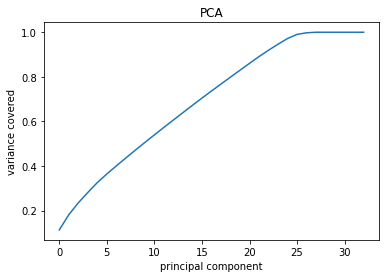

In [139]:

#  let's plot scree plot to check the how many feature are covered more 
                                            #            variance (that called best component)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal component')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()


In [140]:
#
pca= PCA(n_components= 22)
new_comp= pca.fit_transform(scaled)
p_comp= pd.DataFrame(new_comp, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'
                                        'pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23',])

In [141]:
# DECISION TREE REGRESSOR with input_variable pca-component

# IN TRAINING PROCESS          # finding best random_state for  

from sklearn.tree import DecisionTreeRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,110):
    x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = r_state,test_size=0.25,)
    dt = DecisionTreeRegressor()
    
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.19174179472149622  random_state is : 50


In [142]:
# GRADIENTBOOSTING  with input variable pca_component

# IN TRAINING PROCESS          # finding best random_state for  

from sklearn.ensemble import GradientBoostingRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,110):
    x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = r_state,test_size=0.25,)
    gb = GradientBoostingRegressor()
    
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)

# this model fit with pca component but not give score more then compare to without using  pca_method


maximum accuracy : 0.5269280929604294  random_state is : 50
maximum accuracy : 0.5363306708417648  random_state is : 51
maximum accuracy : 0.5475957083250629  random_state is : 52
maximum accuracy : 0.5564169519277529  random_state is : 59


In [144]:
# USING GRADIENTBOOSTING REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 87,test_size=0.25,)
gb= GradientBoostingRegressor(n_estimators=150,)

gb.fit(x_train,y_train)
pred= gb.predict(x_test)

print('r2_score with AdaBoost = ',r2_score(y_test,pred))
print('mean_squared_error',mse(y_test,pred))

r2_score with AdaBoost =  0.5415517003163395
mean_squared_error 1399981.106723848


with input_feature of PCA_componenet don't get more accuracy compare with without pca or without unscaled data
WE get same accuracy

In [147]:
from sklearn.model_selection import GridSearchCV
gbr= GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 101,test_size=0.25,)

param= {'n_estimators':[100,180],'max_depth':[3,5,6],'min_samples_split':[2,3],'min_samples_leaf':[1,2],
        'learning_rate':[0.1,1.0],'subsample':[0.7,1.0]}
grid= GridSearchCV(gbr,param, cv=6,n_jobs=-1)

grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 101,test_size=0.25,)

gb_r= GradientBoostingRegressor(learning_rate=0.1,max_depth=3,min_samples_leaf=2, min_samples_split=2,
                              n_estimators=100, subsample=1.0)
gb_r.fit(x_train,y_train)
pred= gb_r.predict(x_test)

print('r2_score=', r2_score(y_test,pred))
print('MEAN_SQUARED_ERROR=', mse(y_test,pred))
print('mean_absolute_error=', mae(y_test,pred))


r2_score= 0.6228204398646303
MEAN_SQUARED_ERROR= 1118380.9847526068
mean_absolute_error= 752.6302408969533


 LET'S USE  GRIDSEARCHCV  WITH RANDOM_FOREST_REGRESSOR


In [149]:
rf_r= RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 101,test_size=0.25,)

param= {'n_estimators':[100,180],'max_depth':[3,5,6],'min_samples_split':[2,3],'min_samples_leaf':[1,2],
        'max_features':[0.7,1.0]}
grid1= GridSearchCV(rf_r,param, cv=6,n_jobs=-1)

grid1.fit(x_train,y_train)
grid1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [150]:

RF_R= RandomForestRegressor(n_estimators=100 ,max_depth= 6,min_samples_split=2 , min_samples_leaf= 2,
                            max_features=0.7)

RF_R.fit(x_train,y_train)
pred= RF_R.predict(x_test)

print('r2_score=', r2_score(y_test,pred))
print('MEAN_SQUARED_ERROR=', mse(y_test,pred))
print('mean_absolute_error=', mae(y_test,pred))


r2_score= 0.6254044092631867
MEAN_SQUARED_ERROR= 1110719.2168681251
mean_absolute_error= 740.648791789529


In [151]:
import pickle

big_data_mart_sales= 'big_data_mart_sales.pickle'

In [152]:
pickle.dump(gb_r,open(big_data_mart_sales, 'wb'))

In [153]:
model= pickle.load(open(big_data_mart_sales, 'rb'))

In [163]:
test1= X[X['Item_Outlet_Sales']==0]    # this is test dataset

In [168]:
test1.drop('Item_Outlet_Sales', axis=1, inplace=True)

In [169]:
test1.reset_index(drop=True, inplace=True)

In [160]:
#model.predict()

In [176]:
model.predict([test1.loc[0,:]])  # predict the test dataset 

array([1741.19914086])

In [ ]:
#  we tried 'RandomForest' with 'scaled' and 'unscaled' input_features , both given same score
